<a href="https://colab.research.google.com/github/ma7moud-3baset/Soft-Computing-Project/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import random


In [ ]:
# Load the dataset (change the path as needed)
df = pd.read_csv('/content/musk.csv')

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (25% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
# Function to evaluate and visualize model performance
def print_evaluation(y_true, y_pred, title="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n--- Model Evaluation: {title} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Musk', 'Musk'], yticklabels=['Non-Musk', 'Musk'])
    plt.title(f'Confusion Matrix - {title}\nAccuracy: {acc:.2%}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc, prec, rec, f1



--- Model Evaluation: SVM - All Features ---
Accuracy : 0.8655
Precision: 0.8103
Recall   : 0.9038
F1-score : 0.8545

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        67
           1       0.81      0.90      0.85        52

    accuracy                           0.87       119
   macro avg       0.86      0.87      0.86       119
weighted avg       0.87      0.87      0.87       119



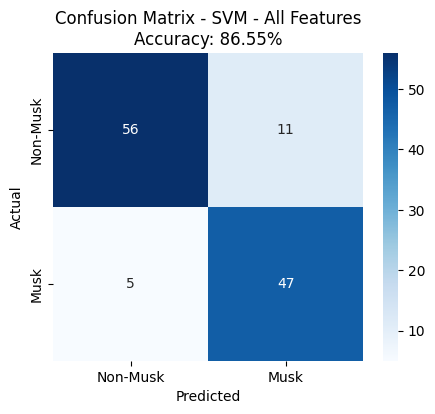

In [ ]:
# Train SVM using all features
model_all_svm = SVC(kernel='linear', random_state=42)
model_all_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_all_svm = model_all_svm.predict(X_test)
acc_all_svm, prec_all_svm, rec_all_svm, f1_all_svm = print_evaluation(y_test, y_pred_all_svm, "SVM - All Features")


In [ ]:
# Genetic Algorithm setup
population_size = 20
generations = 20
mutation_rate = 0.1
n_features = X_train.shape[1]

# Initialize population
def initialize_population():
    return [np.random.choice([0, 1], size=n_features) for _ in range(population_size)]

# Fitness function
def fitness(chromosome):
    selected_features = [i for i, gene in enumerate(chromosome) if gene == 1]
    if len(selected_features) == 0:
        return 0
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    return accuracy_score(y_test, y_pred)


In [ ]:
# Selection
def select_parents(population, fitnesses):
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    return sorted_population[:2]

# Crossover
def crossover(parent1, parent2):
    point = random.randint(1, n_features - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

# Mutation
def mutate(chromosome):
    for i in range(n_features):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome


In [ ]:
# Run Genetic Algorithm
population = initialize_population()

for generation in range(generations):
    fitnesses = [fitness(chrom) for chrom in population]
    best_fit = max(fitnesses)
    print(f"GA Generation {generation+1}: Best Accuracy = {best_fit:.4f}")
    new_population = []
    for _ in range(population_size // 2):
        parents = select_parents(population, fitnesses)
        child1, child2 = crossover(parents[0], parents[1])
        new_population.extend([mutate(child1), mutate(child2)])
    population = new_population


GA Generation 1: Best Accuracy = 0.8739
GA Generation 2: Best Accuracy = 0.8739
GA Generation 3: Best Accuracy = 0.8824
GA Generation 4: Best Accuracy = 0.8739
GA Generation 5: Best Accuracy = 0.8824
GA Generation 6: Best Accuracy = 0.8824
GA Generation 7: Best Accuracy = 0.8824
GA Generation 8: Best Accuracy = 0.8739
GA Generation 9: Best Accuracy = 0.8908
GA Generation 10: Best Accuracy = 0.8824
GA Generation 11: Best Accuracy = 0.8908
GA Generation 12: Best Accuracy = 0.8739
GA Generation 13: Best Accuracy = 0.8908
GA Generation 14: Best Accuracy = 0.8908
GA Generation 15: Best Accuracy = 0.8992
GA Generation 16: Best Accuracy = 0.8908
GA Generation 17: Best Accuracy = 0.8824
GA Generation 18: Best Accuracy = 0.8824
GA Generation 19: Best Accuracy = 0.9076
GA Generation 20: Best Accuracy = 0.9160



--- Model Evaluation: SVM - GA Selected Features ---
Accuracy : 0.9160
Precision: 0.8621
Recall   : 0.9615
F1-score : 0.9091

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        67
           1       0.86      0.96      0.91        52

    accuracy                           0.92       119
   macro avg       0.91      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



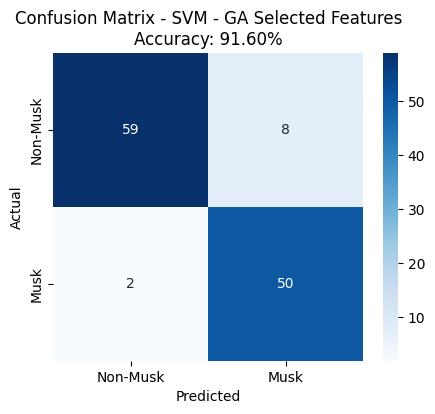

In [ ]:
# Select best chromosome and evaluate final model
fitnesses = [fitness(chrom) for chrom in population]
best_chromosome = population[np.argmax(fitnesses)]
selected_features_ga = [i for i, gene in enumerate(best_chromosome) if gene == 1]

model_ga_svm = SVC(kernel='linear', random_state=42)
model_ga_svm.fit(X_train[:, selected_features_ga], y_train)
y_pred_ga_svm = model_ga_svm.predict(X_test[:, selected_features_ga])
acc_ga_svm, prec_ga_svm, rec_ga_svm, f1_ga_svm = print_evaluation(y_test, y_pred_ga_svm, "SVM - GA Selected Features")


In [ ]:
# Particle Swarm Optimization setup
n_particles = 20
iterations = 20
w = 0.5
c1 = 1.5
c2 = 1.5

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

# Initial evaluation
for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = SVC(kernel='linear', random_state=42)
        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, y_pred)


In [ ]:
# Run PSO iterations
global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

for iteration in range(iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = SVC(kernel='linear', random_state=42)
            model.fit(X_train[:, selected], y_train)
            y_pred = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, y_pred)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()
    print(f"PSO Iteration {iteration+1}: Best Accuracy = {personal_best_scores[global_best_idx]:.4f}")


PSO Iteration 1: Best Accuracy = 0.8908
PSO Iteration 2: Best Accuracy = 0.8908
PSO Iteration 3: Best Accuracy = 0.8908
PSO Iteration 4: Best Accuracy = 0.8908
PSO Iteration 5: Best Accuracy = 0.8908
PSO Iteration 6: Best Accuracy = 0.8908
PSO Iteration 7: Best Accuracy = 0.8908
PSO Iteration 8: Best Accuracy = 0.8908
PSO Iteration 9: Best Accuracy = 0.8908
PSO Iteration 10: Best Accuracy = 0.8908
PSO Iteration 11: Best Accuracy = 0.9160
PSO Iteration 12: Best Accuracy = 0.9160
PSO Iteration 13: Best Accuracy = 0.9244
PSO Iteration 14: Best Accuracy = 0.9244
PSO Iteration 15: Best Accuracy = 0.9244
PSO Iteration 16: Best Accuracy = 0.9244
PSO Iteration 17: Best Accuracy = 0.9244
PSO Iteration 18: Best Accuracy = 0.9244
PSO Iteration 19: Best Accuracy = 0.9244
PSO Iteration 20: Best Accuracy = 0.9244



--- Model Evaluation: SVM - PSO Selected Features ---
Accuracy : 0.9244
Precision: 0.8909
Recall   : 0.9423
F1-score : 0.9159

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.89      0.94      0.92        52

    accuracy                           0.92       119
   macro avg       0.92      0.93      0.92       119
weighted avg       0.93      0.92      0.92       119



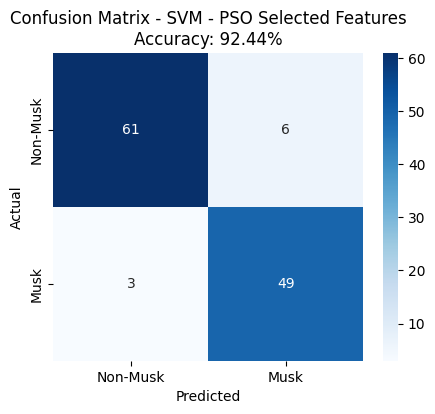

In [ ]:
# Select best features from PSO and evaluate final model
best_features_mask = global_best_position > 0.5
selected_features_pso = [i for i, selected in enumerate(best_features_mask) if selected]

model_pso_svm = SVC(kernel='linear', random_state=42)
model_pso_svm.fit(X_train[:, selected_features_pso], y_train)
y_pred_pso_svm = model_pso_svm.predict(X_test[:, selected_features_pso])
acc_pso_svm, prec_pso_svm, rec_pso_svm, f1_pso_svm = print_evaluation(y_test, y_pred_pso_svm, "SVM - PSO Selected Features")


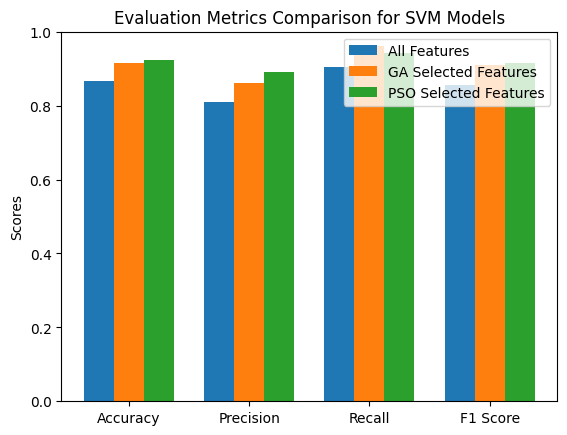

In [ ]:
# Compare performance metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
all_scores = [acc_all_svm, prec_all_svm, rec_all_svm, f1_all_svm]
ga_scores = [acc_ga_svm, prec_ga_svm, rec_ga_svm, f1_ga_svm]
pso_scores = [acc_pso_svm, prec_pso_svm, rec_pso_svm, f1_pso_svm]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, all_scores, width, label='All Features')
plt.bar(x, ga_scores, width, label='GA Selected Features')
plt.bar(x + width, pso_scores, width, label='PSO Selected Features')

plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison for SVM Models')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()
